In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

###  data analysis

In [469]:
x_train =pd.read_csv('train.csv')

In [470]:
x_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [471]:
x_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [472]:
x_train.info()
#notice that there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


##### explotaly data analysis

- questoins we want to find out ->

- what is the chance of the survive ? 
- does Homeplanet play a role in the survive ratio ?
- does cabin   play a role in the survive ratio ?
- does age  play a role in the survive ratio ?
- are the vip members have more chance to survive ? 

In [473]:
x_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Q1) what is the chance of being Transported ? 

In [474]:
# what is the chance of Transported ? 

True_Transported =len(x_train[x_train['Transported'] == True ]) ## getting the transported True first
Transported_len =len(x_train['Transported']) ##getting the whole transported column length

Transported_portion = (True_Transported / Transported_len) *100

print(f'The percentage of people that transported successfuly {Transported_portion.__round__(2)}%')


The percentage of people that transported successfuly 50.36%


#### Q2)what is the portion of being successfuly Trasported from each planet 'HomePlanet? 

<Axes: xlabel='HomePlanet', ylabel='count'>

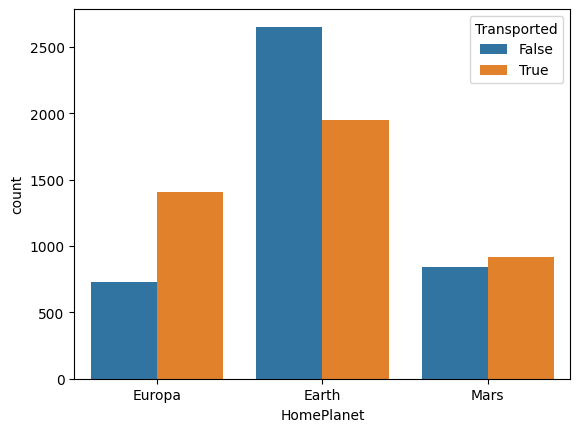

In [475]:
sns.countplot(data= x_train,x='HomePlanet',hue='Transported')

###### chances of being transported from earth planet

The percentage of being Successfuly Trasnported from earth 42.39461103867884


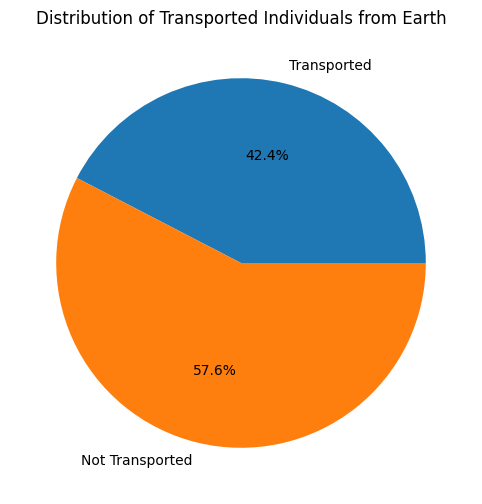

In [476]:
successfuly_Transported =len(x_train[(x_train['Transported'] == True) & (x_train['HomePlanet'] == 'Earth')])
Total_Transported = len(x_train[x_train['HomePlanet'] == 'Earth'])
print(f'The percentage of being Successfuly Trasnported from earth {(successfuly_Transported / Total_Transported ) * 100 }')
##Create the pie chart
plt.figure(figsize=(10,6))
plt.pie([successfuly_Transported, Total_Transported-successfuly_Transported], labels = ['Transported', 'Not Transported'], autopct='%1.1f%%')
plt.title(f'Distribution of Transported Individuals from Earth')
plt.show()

###### chances of being transported from Europe planet


The percentage of the Trasnported from Europa 65.884561238855


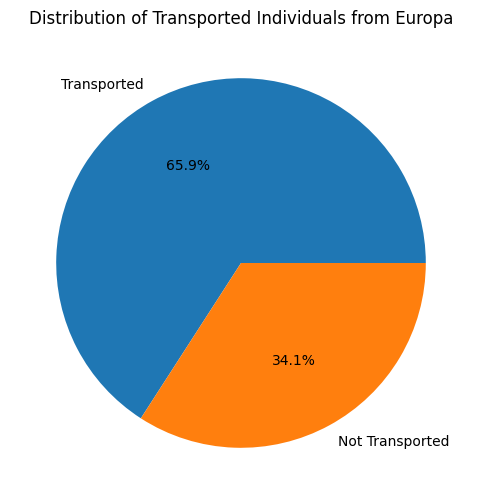

In [477]:
successfuly_Transported =len( x_train[(x_train['HomePlanet'] == 'Europa') & (x_train['Transported'] == True)] )
Total_Transported =len(x_train[(x_train['HomePlanet'] == 'Europa')] )
print(f'The percentage of the Trasnported from Europa {(successfuly_Transported / Total_Transported ) * 100}')
##Create the pie chart
plt.figure(figsize=(10,6))
plt.pie([successfuly_Transported , Total_Transported - successfuly_Transported ],labels=['Transported','Not Transported'],autopct='%1.1f%%')
plt.title('Distribution of Transported Individuals from Europa')
plt.show()

###### chances of being transported from Mars planet


The percentage of the Trasnported from Europa 52.30244457077885


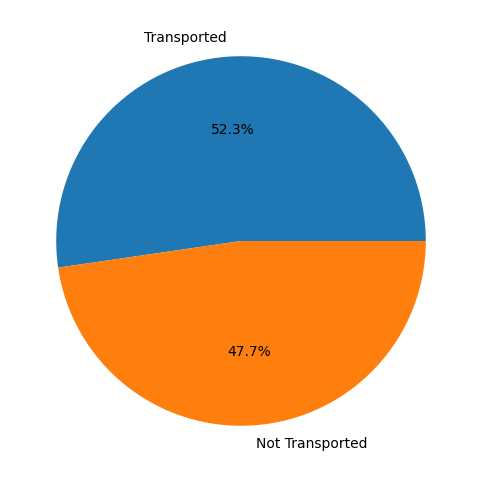

In [478]:
successfuly_Transported =len( x_train[(x_train['HomePlanet'] == 'Mars') & (x_train['Transported'] == True)] )
Total_Transported =len(x_train[(x_train['HomePlanet'] == 'Mars')] )
print(f'The percentage of the Trasnported from Europa {(successfuly_Transported / Total_Transported ) * 100}')
##Create the pie chart
plt.figure(figsize=(10,6))
plt.pie([successfuly_Transported,Total_Transported-successfuly_Transported],labels= ['Transported','Not Transported'] ,autopct='%1.1f%%')
plt.show()

#### Q3)Is it more likely that the people who is in groups have a higher survival chances?

- - notice that :
- PassengerId : A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.



In [479]:
x_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [480]:
# trying to get a useful columns from the PassengerId
# I'd like to change the Dtype of the new columns to be int rather than object (str)
x_train['Passenger_Group'] =x_train['PassengerId'].str.split('_').str.get(0).astype('Int64')
# x_train['Passenger_Group'].astype('Int64')
x_train['Passenger_Number'] =x_train['PassengerId'].str.split('_').str.get(1).astype('Int64')
# x_train['Passenger_Number'].astype('Int64')

# droping the Passenger Column Since we dont need it anymore
x_train.drop(['PassengerId'],inplace=True,axis=1)
x_train


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_Group,Passenger_Number
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1


In [481]:
#grouping by the Groups of people to get some insights
'''
there's a problem 
-the df contains Objects so when we call sum() it concacinates the values 
so we have to select the Int and Float columns only
x_train.groupby(['Passenger_Group'],sort= True).sum()
'''
numeric_df=x_train.select_dtypes(include=['float64', 'int64'])
numeric_df.groupby(['Passenger_Group'],sort= True).sum()

# print(type(x_train['Passenger_Number']))
# numeric_df
# x_train.dtypess

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_Number
Passenger_Group,,,,,,,
1,39.0,0.0,0.0,0.0,0.0,0.0,1
2,24.0,109.0,9.0,25.0,549.0,44.0,1
3,91.0,43.0,4859.0,371.0,10044.0,242.0,3
4,16.0,303.0,70.0,151.0,565.0,2.0,1
5,44.0,0.0,483.0,0.0,291.0,0.0,1
...,...,...,...,...,...,...,...
9275,62.0,1.0,4354.0,0.0,52.0,364.0,6
9276,41.0,0.0,6819.0,0.0,1643.0,74.0,1
9278,18.0,0.0,0.0,0.0,0.0,0.0,1


#### Q4)Does Age play an important role in the Trasported ? 



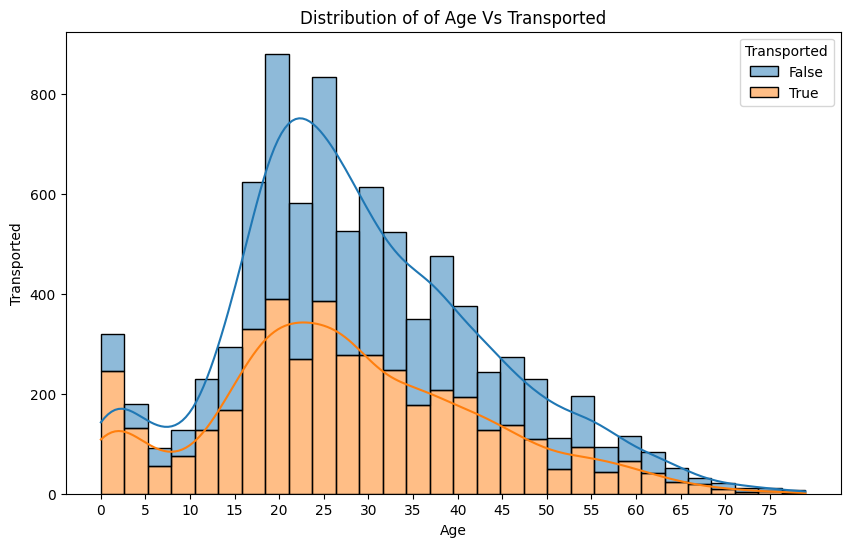

In [482]:
plt.figure(figsize=(10,6))
sns.histplot(data=x_train,x=x_train['Age'],hue=x_train['Transported'],multiple="stack",bins=30, kde=True) 
plt.xticks(np.arange(min(x_train['Age']), max(x_train['Age'])+1, 5))
plt.title('Distribution of of Age Vs Transported')
plt.xlabel('Age')
plt.ylabel('Transported')
plt.show()

the percentage of being Transported within age between 15-50 is 48.08726838015541


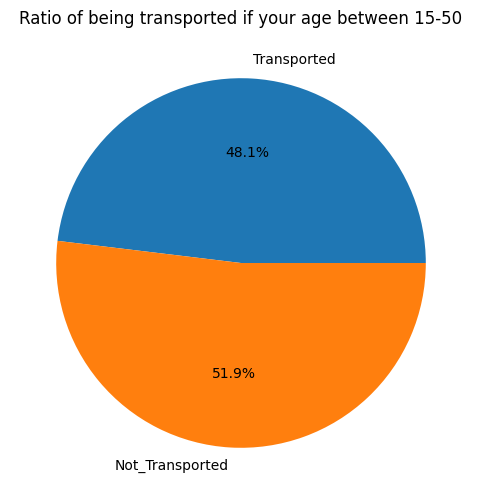

the percentage of being Transported within age between 50-79 is 48.08726838015541


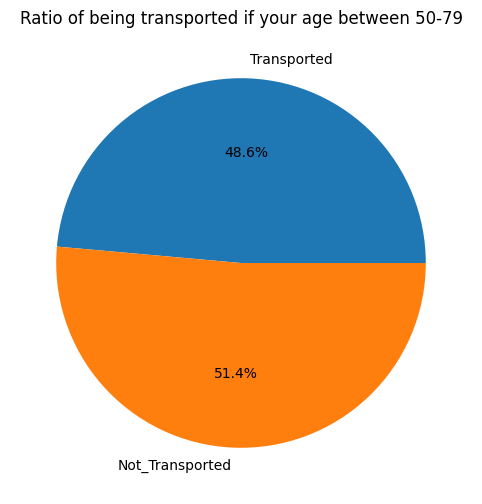

the percentage of being Transported within age between 0-15 is 48.581997533908755


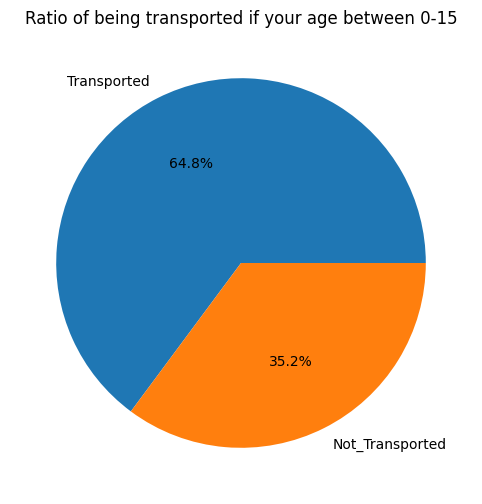

In [483]:
successfuly_Transported_people_Age =len(x_train[(x_train['Age'].between(15,50)) & (x_train['Transported'] == True)]) #2817
successfuly_Transported_people_Total_Age =len(x_train[x_train['Age'].between(15,50)])
print(f'the percentage of being Transported within age between 15-50 is {(successfuly_Transported_people_Age/successfuly_Transported_people_Total_Age)*100}')
plt.figure(figsize=(10,6))
plt.pie([successfuly_Transported_people_Age ,successfuly_Transported_people_Total_Age-successfuly_Transported_people_Age  ],labels=['Transported','Not_Transported'],autopct='%1.1f%%')
plt.title('Ratio of being transported if your age between 15-50')
plt.show()
#####
print(f'the percentage of being Transported within age between 50-79 is {(successfuly_Transported_people_Age/successfuly_Transported_people_Total_Age)*100}')
successfuly_Transported_people_Age =len(x_train[(x_train['Age'].between(50,79)) & (x_train['Transported'] == True)]) #2817
successfuly_Transported_people_Total_Age =len(x_train[x_train['Age'].between(50,79)])
plt.figure(figsize=(10,6))
plt.pie([successfuly_Transported_people_Age ,successfuly_Transported_people_Total_Age-successfuly_Transported_people_Age  ],labels=['Transported','Not_Transported'],autopct='%1.1f%%')
plt.title('Ratio of being transported if your age between 50-79')
plt.show()
##
print(f'the percentage of being Transported within age between 0-15 is {(successfuly_Transported_people_Age/successfuly_Transported_people_Total_Age)*100}')
successfuly_Transported_people_Age =len(x_train[(x_train['Age'].between(0,15)) & (x_train['Transported'] == True)]) #2817
successfuly_Transported_people_Total_Age =len(x_train[x_train['Age'].between(0,15)])
plt.figure(figsize=(10,6))
plt.pie([successfuly_Transported_people_Age ,successfuly_Transported_people_Total_Age-successfuly_Transported_people_Age  ],labels=['Transported','Not_Transported'],autopct='%1.1f%%')
plt.title('Ratio of being transported if your age between 0-15')
plt.show()

#so this means that if your age are lower than 15 you are more likely to be transported

### Machine learning 

In [484]:
### feature engneering

x_train['Total_Money_Spent'] = x_train['RoomService']+x_train['FoodCourt']+x_train['ShoppingMall']+x_train['Spa']+x_train['VRDeck']

x_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP','Name'],inplace=True,axis=1)

x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported,Passenger_Group,Passenger_Number,Total_Money_Spent
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,1,1,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,True,2,1,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,False,3,1,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,3,2,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,True,4,1,1091.0
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,False,9276,1,8536.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,9278,1,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,True,9279,1,1873.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,9280,1,4637.0


In [485]:

#notice that you have alot of null values and your dataset is small 
'''
i will just drop the missing data 
- notice that after droping the null values we almost removed the quarter of our data
'''
x_train.isnull().sum()
x_train.dropna(inplace=True)
x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,Transported,Passenger_Group,Passenger_Number,Total_Money_Spent
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,1,1,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,True,2,1,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,False,3,1,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,3,2,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,True,4,1,1091.0
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,False,9276,1,8536.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,9278,1,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,True,9279,1,1873.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,9280,1,4637.0


In [486]:
x_train.isna().sum()

HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
Age                  0
Transported          0
Passenger_Group      0
Passenger_Number     0
Total_Money_Spent    0
dtype: int64

In [487]:
''' 
Notice the difference between the min and max in each coulmn 
-we have to scale the features
'''

## what is the preprocssing that we need in this project ?
#1-splitting the target column from the data so that you have x_train and y_train
##2-pipeline that contain :
## 2.1- feature scaling 
## 2.2- encoder -> for the categorical data 

' \nNotice the difference between the min and max in each coulmn \n-we have to scale the features\n'

In [488]:

#1-splitting the traindf
y_train = x_train['Transported']
x_train.drop('Transported',axis=1,inplace= True)


In [489]:
x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,Passenger_Group,Passenger_Number,Total_Money_Spent
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,1,1,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,2,1,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,3,1,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,3,2,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,4,1,1091.0
...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,9276,1,8536.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,9278,1,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,9279,1,1873.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,9280,1,4637.0


In [490]:
##2-pipeline that contain :
## 2.1 scaler
## 2.2 encoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Identify the numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=object).columns.tolist()

# Create preprocessing pipelines for each type of feature
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine the preprocessing pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])



In [491]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# # Assume you have features X and target y
# # X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# models = [
#     # ('Logistic Regression', LogisticRegression()),
#     # ('Random Forest', RandomForestClassifier()),
#     # ('Naive Bayes', GaussianNB()),
#     # ('Stochastic Gradient Descent', SGDClassifier( tol=1e-3)),
#     # ('Support Vector Machine', SVC(kernel='rbf', C=1)),
#     # ('XGBoost', XGBClassifier())
# ]

# for name, model in models:
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     print(f'{name} Accuracy: {accuracy * 100:.2f}%')



In [492]:
# Choose the model to train the data on
model = RandomForestClassifier()
# Create a final pipeline that includes the ColumnTransformer and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
# Fit the pipeline to the training data and make predictions on the test data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
pipeline.score(X_test, y_test)


0.7352092352092352

#### model evaluation :

#### preprocessing without the pipeline

In [493]:
# ## 1-scaling
# from sklearn.preprocessing import MinMaxScaler
# Numerical_cols = list(x_train.select_dtypes(include='Int64')) + list(x_train.select_dtypes(include='float64')) 
# Scaler = MinMaxScaler()
# X_scaled=Scaler.fit_transform(x_train[Numerical_cols])
# x_train[Numerical_cols] = X_scaled
# # scaling is done 


In [494]:
# # 2-encoding
# from sklearn.preprocessing import OneHotEncoder
# Categorical_cols = list(x_train.select_dtypes(include='object'))
# # Initialize the OneHotEncoder
# Enc = OneHotEncoder(sparse=False)
# # Fit the OneHotEncoder and transform the categorical columns
# Encoded_cols = Enc.fit_transform(x_train[Categorical_cols])
# # Create a DataFrame from the encoded columns
# Encoded_cols_df = pd.DataFrame(Encoded_cols, columns=Enc.get_feature_names_out(Categorical_cols))
# # Reset the index of the encoded DataFrame
# Encoded_cols_df.reset_index(drop=True, inplace=True)
# # Concatenate the original DataFrame with the encoded DataFrame
# df_encoded = pd.concat([x_train.reset_index(drop=True), Encoded_cols_df], axis=1)
# # Drop the original categorical columns
# df_encoded = df_encoded.drop(Categorical_cols, axis=1)
# df_encoded
# # encoding is done 